CST 383: Introduction to Data Science

Montgomery Crash Data Project 

Bobby Davis

Jonathan Welham

# **Introduction**

Montgomery County, MD, has provided a dataset report which details all traffic collisions occuring on county and local roadways within the county. This data was collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police.

This data report updates weekly but for our purposes we will be using the version which was downloaded on March 10th, 2020.

1. Link to Data: https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632

# **Initial Data Exploration**

As we begin our anaylsis of the data we use pandas.DataFrame.info() and pandas.DataFrame.describe() methods to see the names of columns, types of each column, and the number of rows. We can also some statistics about the non-object columns. We will run the numeric columns through Seaborns pairplot method to see if we can find any interesting correlations.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)




df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108931 entries, 0 to 108930
Data columns (total 43 columns):
Report Number                     108931 non-null object
Local Case Number                 108931 non-null object
Agency Name                       108931 non-null object
ACRS Report Type                  108931 non-null object
Crash Date/Time                   108931 non-null object
Route Type                        98507 non-null object
Road Name                         99008 non-null object
Cross-Street Type                 98495 non-null object
Cross-Street Name                 99004 non-null object
Off-Road Description              9922 non-null object
Municipality                      11902 non-null object
Related Non-Motorist              3341 non-null object
Collision Type                    108570 non-null object
Weather                           100333 non-null object
Surface Condition                 96060 non-null object
Light                           

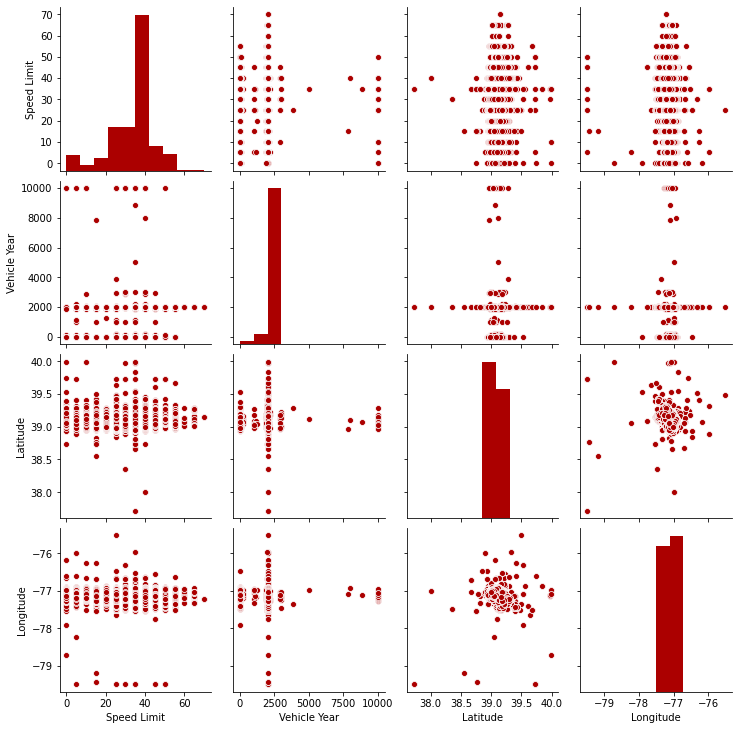

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/CST383_DataSci/Project1/Crash_Reporting_-_Drivers_Data.csv')

#Link to Visualizing with Seaborn: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=9zsYV1-slHrW

print("\n\ndf.info()")
print(df.info())
print("\n")
print("df.describe()")
print(df.describe()) 
print("\n")
sns.pairplot(df);

It appears that there is no correlation in Longitude vs Latitude. These accidents appear to happen around the same area. We continued to explore the data to see what we could make out of it.

The graphs below started off as test graphs but we have decided to keep them as examples of what types of data we can get out of the dataset. The graphs below show the types of accidents associated only with motorcycles.

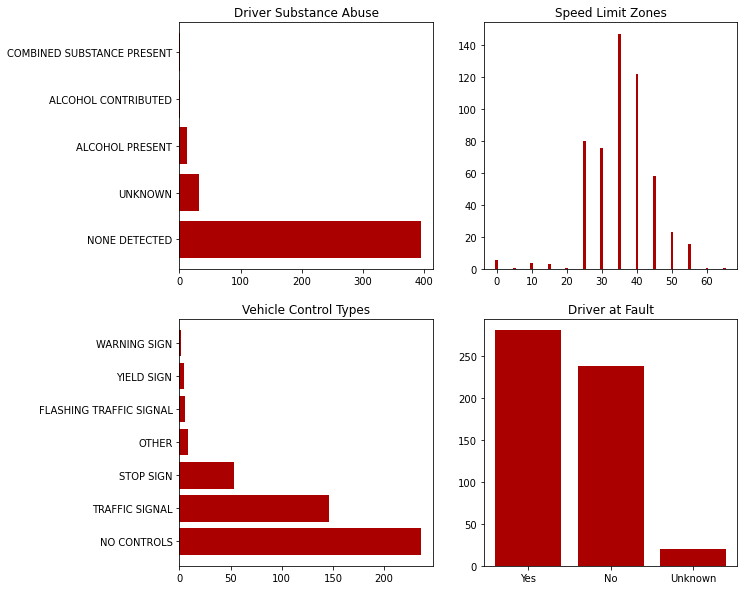

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
temp = df[df["Vehicle Body Type"] == "MOTORCYCLE"]["Driver Substance Abuse"].value_counts()
plt.barh(temp.index, temp.values)
plt.title("Driver Substance Abuse");

plt.subplot(2,2,2)
temp = df[df["Vehicle Body Type"] == "MOTORCYCLE"]["Speed Limit"].value_counts()
plt.bar(temp.index, temp.values)
plt.title("Speed Limit Zones");

plt.subplot(2,2,3)
temp = df[df["Vehicle Body Type"] == "MOTORCYCLE"]["Traffic Control"].value_counts()
plt.barh(temp.index, temp.values)
plt.title("Vehicle Control Types");

plt.subplot(2,2,4)
temp = df[df["Vehicle Body Type"] == "MOTORCYCLE"]["Driver At Fault"].value_counts()
plt.bar(temp.index, temp.values)
plt.title("Driver at Fault");

As we continue looking at the data further, we notice there is a handful of bad data and data. We will be dropping the bad data in the next process where we clean the data to make it more appealing and easier to work with.

# **Data Cleaning and Preprocessing**

Exploring the data visually helped us see that there was much more nan and bad data then previously hypothesized. We notice that by using df.isna().mean().mean() we get an actual value estimation of 13.5% NA values over the entire dataframe. Continuing further, we decided to drop a handful of columns because of bad data or otherwise irrelevant to our goals on the data as a whole.


TOTAL NA VALUES IN DF:
0.1348728755753856

FRACTION OF NA VALUES FOR EACH COLUMN:
Non-Motorist Substance Abuse      0.975709
Related Non-Motorist              0.969329
Off-Road Description              0.908915
Municipality                      0.890738
Circumstance                      0.804518
Equipment Problems                0.224895
Driver Substance Abuse            0.184759
Traffic Control                   0.159789
Surface Condition                 0.118157
Cross-Street Type                 0.095804
Route Type                        0.095694
Cross-Street Name                 0.091131
Road Name                         0.091094
Weather                           0.078931
Drivers License State             0.046451
Vehicle Continuing Dir            0.014789
Vehicle Going Dir                 0.014789
Vehicle Body Type                 0.014165
Light                             0.008326
Collision Type                    0.003314
Vehicle Second Impact Location    0.002350
Vehicle Moveme

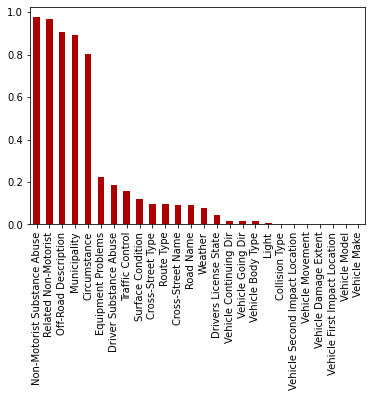

In [ ]:
##Running this code block twice will cause an error because the dataframe gets modified at the very end of the code block. 

df.index = pd.to_datetime(df['Crash Date/Time'])
df = df.sort_index()

print("\nTOTAL NA VALUES IN DF:")
total_NA = df.isna().mean().mean()
print(str(total_NA) + "\n")

print("FRACTION OF NA VALUES FOR EACH COLUMN:")
frac_NA = df.isna().mean().sort_values(ascending=False)
print(str(frac_NA) + "\n")

print("COLUMNS WITH MORE THEN 50% NA VALUES")
print(frac_NA[frac_NA > .50].index.sort_values())

# plot columns bigger then 0% NA values
print("\nColumns with more than 0% NA values")
frac_NA[frac_NA > 0].plot.bar()

df = df.drop(['Report Number', 'Local Case Number', 'Person ID', 'Off-Road Description', 'Municipality', 'Vehicle ID', 'Drivers License State', 'Non-Motorist Substance Abuse', 'Driverless Vehicle',	'Parked Vehicle', 'Latitude',	'Longitude',	'Location', 'Cross-Street Type', 'Related Non-Motorist', 'Crash Date/Time', 'Circumstance'], axis=1);

After dropping some columns because of bad data we re-assessed the data. We observe that there are still some NaN values but they are not detrimental to our analysis. Let's continue into the exploration process...

# **Data Exploration and Visualization**

## **Are certain car brands associated with more crashes?**

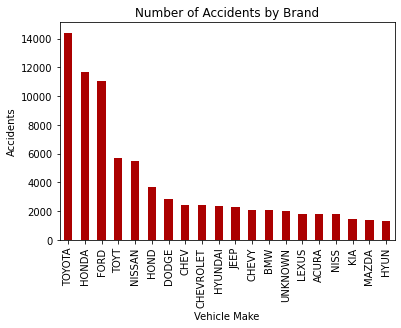

In [ ]:
temp1 = df["Vehicle Make"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(20)

ax = temp1.plot.bar()
ax.set_title('Number of Accidents by Brand')
ax.set_ylabel('Accidents')
ax.set_xlabel('Vehicle Make');

Looking at the top 20 makes that were involved in accidents it shows that Toyota, Honda and Ford were the most accident prone.

This begs the question; Are owners of these makes bad drivers?

Are there just more owners of these makes of vehicles in the county?

Were these vehicles parked? Were the drivers under the influence?

This data could mean anything so we must investigate further.

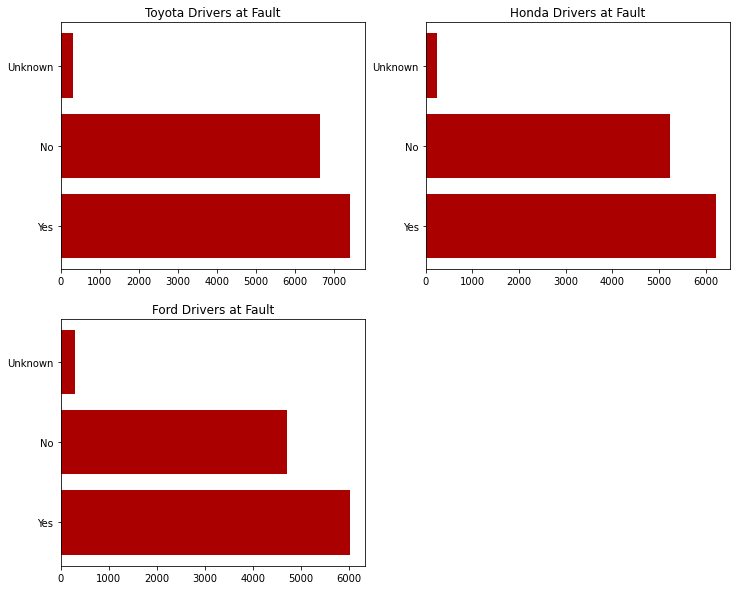

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
temp = df[df["Vehicle Make"] == "TOYOTA"]["Driver At Fault"].value_counts()
plt.barh(temp.index, temp.values)
plt.title("Toyota Drivers at Fault")

plt.subplot(2,2,2)
temp = df[df["Vehicle Make"] == "HONDA"]["Driver At Fault"].value_counts()
plt.barh(temp.index, temp.values)
plt.title("Honda Drivers at Fault")

plt.subplot(2,2,3)
temp = df[df["Vehicle Make"] == "FORD"]["Driver At Fault"].value_counts()
plt.barh(temp.index, temp.values)
plt.title("Ford Drivers at Fault");

It seems that sometimes they were at fault and sometimes they were not. What else can we do to filter the data more?

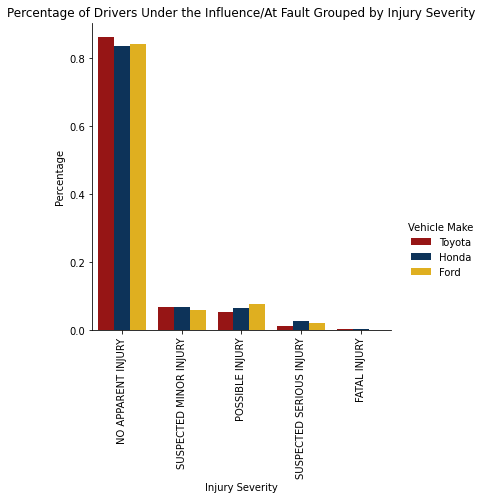

In [ ]:
toyota = df[
    (df["Vehicle Make"] == "TOYOTA") &
    (df["Driver Substance Abuse"] == "ALCOHOL PRESENT") &
    (df["Driver At Fault"] == "Yes")
]["Injury Severity"]
toyota = toyota.value_counts()
toyota = toyota / toyota.sum()
toyotas = np.full(toyota.size, "Toyota")

honda = df[
    (df["Vehicle Make"] == "HONDA") &
    (df["Driver Substance Abuse"] == "ALCOHOL PRESENT") &
    (df["Driver At Fault"] == "Yes")
]["Injury Severity"]
honda = honda.value_counts()
honda = honda / honda.sum()
hondas = np.full(honda.size, "Honda")

ford = df[
    (df["Vehicle Make"] == "FORD") &
    (df["Driver Substance Abuse"] == "ALCOHOL PRESENT") &
    (df["Driver At Fault"] == "Yes")
]["Injury Severity"]
ford = ford.value_counts()
ford = ford / ford.sum()
fords = np.full(ford.size, "Ford")

df1 = pd.DataFrame({
    "Injury Severity": np.concatenate([toyota.index, honda.index, ford.index]),
    "Percentage": np.concatenate([toyota.values, honda.values, ford.values]),
    "Vehicle Make": np.concatenate([toyotas, hondas, fords])
})

graph1 = sns.catplot(
    data=df1,
    hue="Vehicle Make",
    kind="bar",
    palette=sns.set_palette(["#AB0000", "#003366","#FFBF00"]),
    x="Injury Severity",
    y="Percentage"
)
plt.title('Percentage of Drivers Under the Influence/At Fault Grouped by Injury Severity')
plt.xticks(rotation="vertical");

The graph above shows the injury severity associated with drivers who were at fault and under the influence of alcohol while driving.  While the data shows that there was less than 20% injury it shows that at least 80% had no apparent injury. However, this graph also shows that these drivers were in fact under the influence while driving. 

Something we noticed about this that we did not see at first is that this also points out that Toyota, Honda, and Ford may in fact be safer vehicles showing that roughly 80% sustained no apparent injury while getting into an accident.

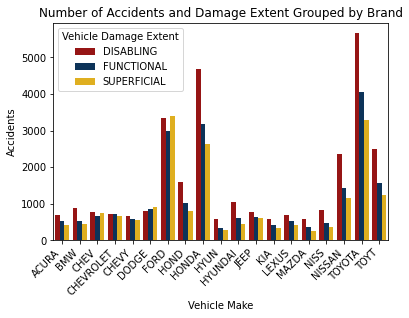

In [ ]:
temp1 = df["Vehicle Make"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(20)

var1 = "Vehicle Make"
var2 = "Vehicle Damage Extent"

df2 = df[df["Vehicle Make"].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:3].index
df2 = df2[df2[var2].isin(top_w)]

df2 = df2[df2[var1] != "UNKNOWN"]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Number of Accidents and Damage Extent Grouped by Brand')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

In retrospect against the previous graphs; while the driver may not have sustained much injury, the vehicles themselves seem to have been disabled in the crash.

##**What roads in Montgomery County have the most accidents and why?**

We played the data a bit trying out some ideas and questions we thought might be interesting. This block shows which roads have the most accidents in the county.

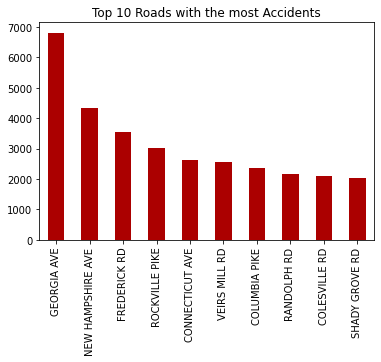

In [ ]:
# Question: What roads have the most accidents and why
    # seems like no matter what Georgia Ave has the most accidents

# For each 'Road Name' show amount of accidents
temp1 = df["Road Name"].value_counts().sort_values(ascending=False)

# # Look at top 10-15ish roads with highest accident count
temp1 = temp1.head(10)
x = temp1.plot.bar()
x.set_title('Top 10 Roads with the most Accidents');

The graph above shows the top 10 roads with the most frequent accidents. Here we can see that Georgia Ave has the most accidents out of the 10. We began to wonder if we could find out why these roads have more accidents then the others. We were also curious as to why Georgia Ave had so many accidents.

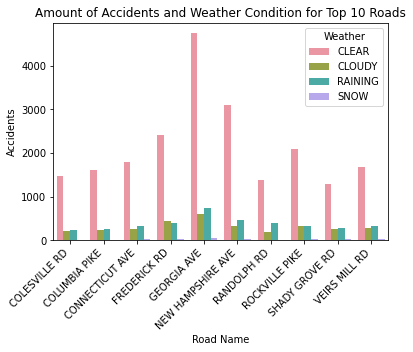

In [ ]:
temp1 = df["Road Name"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(10)

# make some graphs to look for any trends like weather, substance abuse, speed, surface conditions etc.
var1 = "Road Name"
var2 = "Weather"

df2 = df[df["Road Name"].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:4].index
df2 = df2[df2[var2].isin(top_w)]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Weather Condition for Top 10 Roads')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

Here we checked to see if weather played a role in accident frequency on certain roads. Looking at the graph it does not look like weather has a huge impact on accident rate since the majority of accidents happen during clear weather.

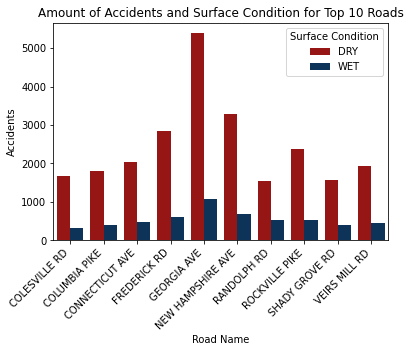

In [ ]:
temp1 = df["Road Name"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(10)

var1 = "Road Name"
var2 = "Surface Condition"

df2 = df[df["Road Name"].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:4].index
df2 = df2[df2[var2].isin(top_w)]

# Remove Ice and Snow because there are almost no values for these on the top 10 roads
df2 = df2[df2[var2] != "ICE"]
df2 = df2[df2[var2] != "SNOW"]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Surface Condition for Top 10 Roads')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

Next we looked at surface conditions for each road. We removed ice and snow from the legend since almost no accidents occured on these roads under those conditions, so the data was kind of meaningless. Again we see that nothing really stands out for surface conditions. 

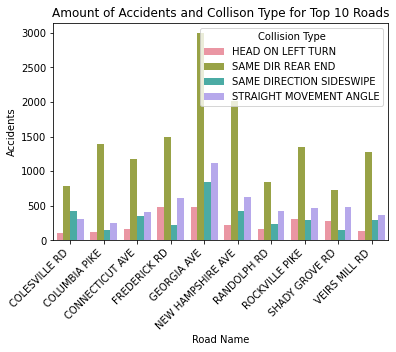

In [ ]:
# looks like for roads with the most accidents rear endings are the most common among them

temp1 = df["Road Name"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(10)

var1 = "Road Name"
var2 = "Collision Type"

df2 = df[df["Road Name"].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:4].index
df2 = df2[df2[var2].isin(top_w)]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Collison Type for Top 10 Roads')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

Here we see that rear endings are the highest type of accident to occur for every road on the graph. It does not appear that any specific road is more likely to have a greater amount of accidents then other roads based of a certain collision type. Since rear endings are the highest cause of accidents for all 10 roads, it might be possible that these roads have the most accidents because of sudden emergency stops occuring for some reason. Another theory is that there might only be one lane for each direction and that is the reason why rear ending are the most frequent.

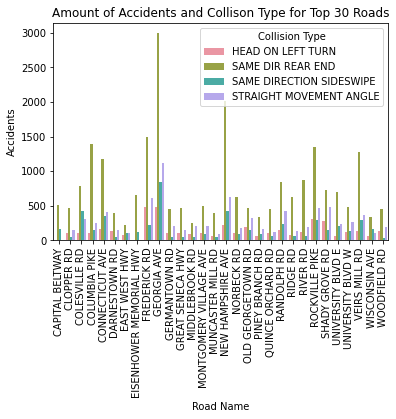

In [ ]:
temp1 = df["Road Name"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(30)

var1 = "Road Name"
var2 = "Collision Type"

df2 = df[df["Road Name"].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:4].index
df2 = df2[df2[var2].isin(top_w)]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Collison Type for Top 30 Roads')
a.set_xticklabels(a.get_xticklabels(), rotation=90);

We decided to look at even more roads to see if rear endings really were the main reason that roads had more accidents than others. Looking at the above graph that theory turned out to be false. We can see that rear endings are still the highest type of collision for each road and not just the top 10 roads with the highest accident frequency. Rear endings might just be the most common accident in general.

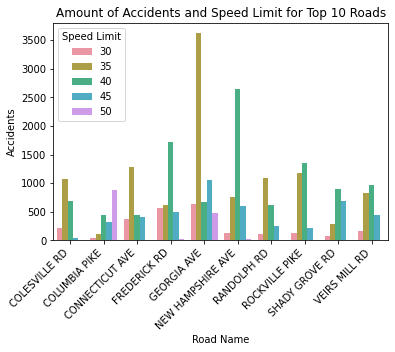

In [ ]:
# most crashes seem to happen where the speed limit is 35-40

temp1 = df["Road Name"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(10)

var1 = "Road Name"
var2 = "Speed Limit"

df2 = df[df["Road Name"].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:5].index
df2 = df2[df2[var2].isin(top_w)]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Speed Limit for Top 10 Roads')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

In the graph above we see that for Geogia Ave the most accidents happen in areas with a speed limit of 35. Is this just because the speed limit is 35 for most of the road, or is there some strange reason why people are more likely to get into an accident at this speed limit? It is also interesting to note that most accidents happen at a speed limit of either 35 or 40 for almost all 10 of these roads. The only exception is Columbia Pike where most accidents happend at a limit of 50.

Out of everything we observed, nothing really stands out as a reason for why Georgia Ave has the most accidents. It could be possible that Georgia Ave just has a much higher frequency of drivers then all the other roads, so an accident is much more likely to occur.

##**Does the type of car play a part in the crash?**



In this section we took a look at what types of cars people were driving at the time of the crash. Initially, we assumed that sports cars would have a greater amount of at fault accidents then not at fault accidents. Lets look into the data.

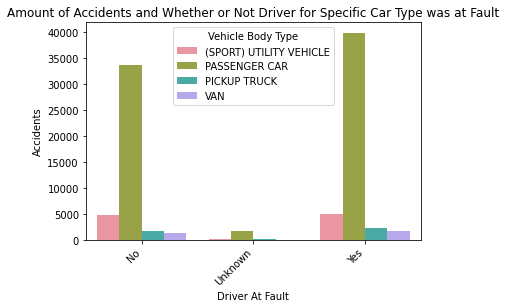

In [ ]:
temp1 = df["Driver At Fault"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(15)

# make some graphs to look for any trends like weather, substance abuse, speed, surface conditions etc.
var1 = "Driver At Fault"
var2 = "Vehicle Body Type"

df2 = df[df[var1].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:4].index
df2 = df2[df2[var2].isin(top_w)]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Whether or Not Driver for Specific Car Type was at Fault')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

From the graph above we see right away that passenger cars have a large amount in both yes and no categories. This is most likely because this is the most common type of car there is. We decided to remove the passenger car and unknown variables from the graph to clean it up.

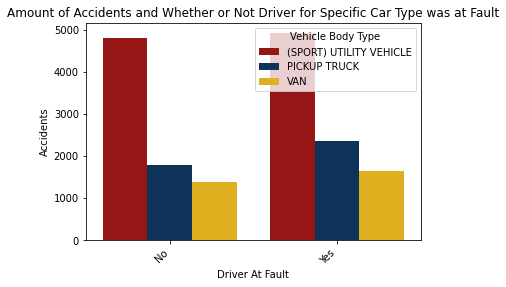

In [ ]:
# got rid of passenger vehicle since this is probably the most common type of car and we
# know accident count is gonna be high so this info is not so interesting

# also got rid of unknown since it doesn't really tell us anything

# relatively even when it comes to at fault for each type of car
# really though at fault was gonna be a lot higher then not at fault for sports cars

temp1 = df["Driver At Fault"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(15)

var1 = "Driver At Fault"
var2 = "Vehicle Body Type"

df2 = df[df[var1].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:4].index
df2 = df2[df2[var2].isin(top_w)]

df2 = df2[df2[var2] != "PASSENGER CAR"]
df2 = df2[df2[var1] != "Unknown"]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Whether or Not Driver for Specific Car Type was at Fault')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

Now we can get a better look and see that for both yes and no categories the amount of accidents appear to be about the same. Our initial hypothesis about the sports cars turned out to be wrong.

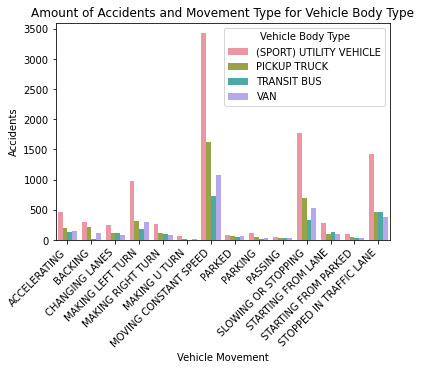

In [ ]:
temp1 = df["Vehicle Movement"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(15)

var1 = "Vehicle Movement"
var2 = "Vehicle Body Type"

df2 = df[df[var1].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:5].index
df2 = df2[df2[var2].isin(top_w)]

df2 = df2[df2[var2] != "PASSENGER CAR"]
df2 = df2[df2[var1] != "UNKNOWN"]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Movement Type for Vehicle Body Type')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

After seeing that the two most common accidents happen at a constant speed we started wondering what types of accident were the most common among these types of cars.

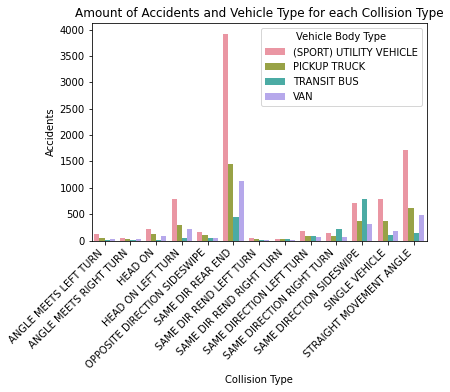

In [ ]:


temp1 = df["Collision Type"].value_counts().sort_values(ascending=False)
temp1 = temp1.head(15)

var1 = "Collision Type"
var2 = "Vehicle Body Type"

df2 = df[df[var1].isin(temp1.index)]

top_w = df2[var2].value_counts()[0:5].index
df2 = df2[df2[var2].isin(top_w)]

df2 = df2[df2[var2] != "PASSENGER CAR"]
df2 = df2[df2[var1] != "UNKNOWN"]
df2 = df2[df2[var1] != "OTHER"]

accidents = df2.groupby([var1, var2]).size().reset_index()
accidents.rename({0: 'Accidents'}, axis='columns', inplace=True)
a = sns.barplot(x=var1, y="Accidents", hue=var2, data=accidents)
a.set_title('Amount of Accidents and Vehicle Type for each Collision Type')
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right');

From the graph above we can see that for every vehicle except the transit bus, rear endings were the most common. This makes sense with the graph above since in most rear endings it is expected that the car behind is most likey trying to slow down or didn't have time to react before hitting the car in front.

# **Conclusions**

Our biggest challenge when researching this data set was the lack of numeric data. Almost all the data was categorical and it made it hard to get meaningful distrubtions and plots. Another challenge we faced was that some of our initial ideas about potential correlations didn't exist. For example, investigating which driver was injured in the crash and which car was actually damaged in the crash. Overall, our exploration of the data led to some interesting findings and this project helped further our knowledge of Data Science.